In [2]:
# Solution set for CS 155 Set 6, 2016/2017
# Authors: Fabian Boemer, Sid Murching, Suraj Nair

import numpy as np
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def grad_U(Ui, Yij, Vj, reg, eta, ai, bj):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    first = reg * Ui
    second = Vj * (Yij - (np.dot(Ui, Vj) + ai + bj))
    grad = eta * (first - second)
    return grad

In [3]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, dtype = np.str , delimiter='\t')

In [4]:
def grad_V(Vj, Yij, Ui, reg, eta, ai, bj):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    first = reg * Vj
    second = Ui * (Yij - (np.dot(Ui, Vj) + ai + bj))
    grad = eta* (first - second)
    return grad

In [5]:
def get_err(U, V, Y, reg, a , b, m):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    summation = 0
    U_val = np.linalg.norm(U)
    V_val = np.linalg.norm(V)
    for x in range (len(Y)): 
        i = Y[x][0] - 1
        j = Y[x][1] - 1
        yij = Y[x][2]
        dot = np.dot(U[i], V[j])
        summation += (yij - (dot + a[i] + b[j])) ** 2
    return (reg/2) * ((U_val)**2 + (V_val)**2) + (summation/2)

In [6]:
def grad_a(Ui, Yij, Vj, reg, eta, ai, bj): 
    return 2 * (eta/50) * (Yij - (np.dot(Ui, Vj) + ai + bj))

In [7]:
def grad_b(Ui, Yij, Vj, reg, eta, ai, bj): 
    return 2 * (eta/50) * (Yij - (np.dot(Ui, Vj) + ai + bj))

In [14]:
def train_model(M, N, K, eta, reg, Y, m, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    U = np.random.uniform(-0.5, 0.5, (M, K))
    V = np.random.uniform(-0.5, 0.5, (N, K))
    # a is user bias
    a = np.full((M, 1), 0.1)
    # b is movie bias
    b = np.full((N, 1), 0.1)
    first_loss = get_err(U, V, Y, reg, a, b, m)
    for epoch in range(max_epochs): 
        Y_shuffle = np.random.permutation(Y)
        prev_loss = get_err(U, V, Y, reg, a, b, m)
        for x in range (len(Y)): 
            i = Y_shuffle[x][0] - 1
            j = Y_shuffle[x][1] - 1
            y = Y_shuffle[x][2] 
            U[i] -= grad_U(U[i], y, V[j], reg, eta, a[i], b[j])
            V[j] -= grad_V(V[j], y, U[i], reg, eta, a[i], b[j])
            a[i] -= grad_a(U[i], y, V[j], reg, eta, a[i], b[j])
            b[j] -= grad_b(U[i], y, V[j], reg, eta, a[i], b[j])
        if (epoch == 0): 
            first_loss -= get_err(U, V, Y, reg, a , b, m)
        else: 
            error_diff = prev_loss - get_err(U, V, Y, reg, a, b, m)
            if (error_diff/first_loss) <= eps: 
                return (U, V, get_err(U, V, Y, reg, a, b, m)/len(Y), a, b)
    error = get_err(U, V, Y, reg, a, b, m)/len(Y)
    return (U, V, error, a , b)

In [15]:
def get_m(y_train): 
    avg = 0
    for i in y_train: 
        avg += i[2]
    return avg/len(y_train)

In [16]:
Y_train = load_data("/Users/Netra/Documents/Caltech2ndYear/2ndTerm/CS155/HW/MiniProject2/data/train.txt")
Y_test = load_data("/Users/Netra/Documents/Caltech2ndYear/2ndTerm/CS155/HW/MiniProject2/data/test.txt")
Y_train = np.array([list(map(int, x)) for x in Y_train])
Y_test = np.array([list(map(int, x)) for x in Y_test])
m = get_m(Y_train)
M = max(max(Y_train[:,0]), max(Y_test[:,0])) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])) # movies
print("Factorizing with ", M, " users, ", N, " movies.")
Ks = [10,20,30,50,100]
reg = 0.0
eta = 0.03 # learning rate
E_in = []
E_out = []
Ein = 0
Eout = 0

Factorizing with  943  users,  1682  movies.


In [22]:
result = train_model(M, N, 20, eta, 0.05, Y_train, m)
U = result[0]
V = result[1]
err = result[2]
a = result[3]
b = result[4]
print("Ein: ", err)
Eout = get_err(U, V, Y_test, 0.05, a , b, m)/len(Y_test)
print("Eout: ", Eout)

Ein:  [0.22898167]
Eout:  [0.52518268]


In [70]:
V = np.transpose(V)
A, S, B = np.linalg.svd(V, full_matrices = False)
print(np.shape(A))
A = np.transpose(A)
print(np.shape(A))
A_12 = A[:,0:2]
print(np.shape(A_12))
A_12 = np.transpose(A_12)
print(np.shape(A_12))
V_s = np.dot(A_12, V)
U_s = np.dot(A_12, np.transpose(U))

(20, 20)
(20, 20)
(20, 2)
(2, 20)


In [71]:
print(np.shape(U_s))
print(np.shape(V_s))

(2, 943)
(2, 1682)


<function matplotlib.pyplot.show(*args, **kw)>

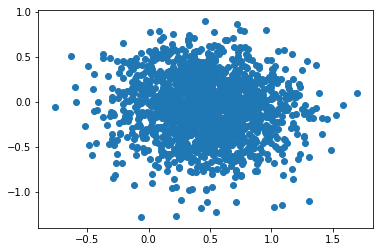

In [75]:
plt.scatter(V_s[0], V_s[1])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

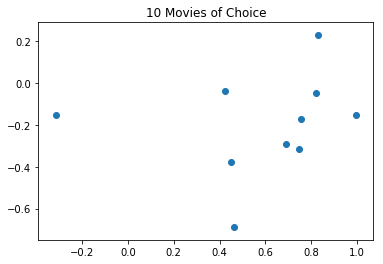

In [78]:
# 10 movies of your choice 
ten = np.zeros([2, 10])
for i in range(2): 
    for j in range(10): 
        ten[i][j] = V_s[i][j]
plt.scatter(ten[0], ten[1])
plt.title("10 Movies of Choice")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

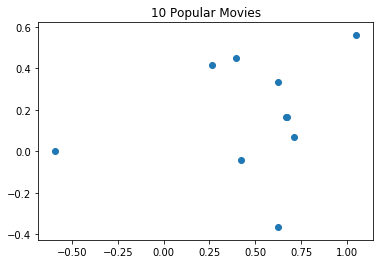

In [87]:
ratings = load_data("/Users/Netra/Documents/Caltech2ndYear/2ndTerm/CS155/HW/MiniProject2/data/data.txt")
ratings = ratings.astype(int)
# all ratings of ten most popular movies which recieved the most ratings
x = np.transpose(ratings[:,1])
counts = np.array(np.unique(x, return_counts = True)).T
#print(counts)
counts = counts[counts[:,1].argsort()]
popular = counts[-10:,:]
pop = np.zeros([2, 10])
for i in range(2): 
    for j in range(10): 
        pop[i][j] = V_s[i][popular[j][0]]
plt.scatter(pop[0], pop[1])
plt.title("10 Popular Movies")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

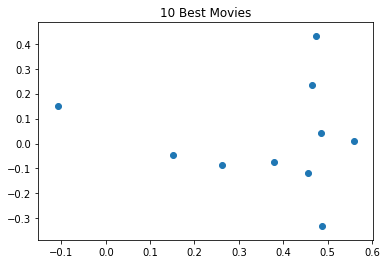

In [97]:
# all ratings of ten best movies with highest average ratings
av = {}
for i in range(len(ratings)):
    name = ratings[i][1]
    if name in av.keys():
        #if the movie already in dictionary
        av[name].append(ratings[i][2])
        
    else:
        av[name] = [ratings[i][2]]

for movie in av.keys():
    #print(str(movie), " ", str(np.mean(av[movie])))
    av[movie] = np.mean(av[movie])

av_movie_ratings = []
for movie_id in av.keys():
    av_movie_ratings.append([movie_id, av[movie_id]])
    
av_movie_ratings = np.asarray(av_movie_ratings)
#print(av_movie_ratings)
    
# for i in range(len(av_movie_ratings)):
#     print(av_movie_ratings[i])

av_ratings = av_movie_ratings[av_movie_ratings[:,1].argsort()]


# for i in range(len(av_counts)):
#     print(av_ratings[i])

popular2 = av_ratings[-10:, :]
pop_best = np.zeros([2, 10])
for i in range(2): 
    for j in range(10): 
        index = popular2[j][0]
        pop_best[i][j] = V_s[i][int(index)]
plt.scatter(pop_best[0], pop_best[1])
plt.title("10 Best Movies")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

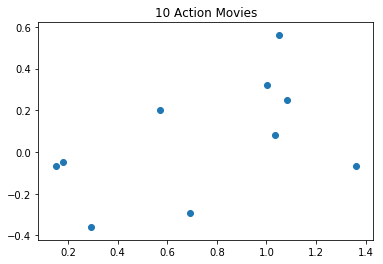

In [101]:
#ratings of 3 different genres
data = load_data("/Users/Netra/Documents/Caltech2ndYear/2ndTerm/CS155/HW/MiniProject2/data/movies.txt")

titles = data[:,0:2]
genres = np.delete(data, 1, axis = 1)

# Action Movies
genre_1 = genres[:, 3]
genre_1_movieid = []
rating = []
for i in range(len(genre_1)): 
    if genre_1[i] == '1': 
        genre_1_movieid.append(genres[i][0])
m1 = np.zeros([2, 10])
for i in range(2): 
    for j in range(10): 
        index = genre_1_movieid[j]
        m1[i][j] = V_s[i][int(index)]
plt.scatter(m1[0], m1[1])
plt.title("10 Action Movies")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

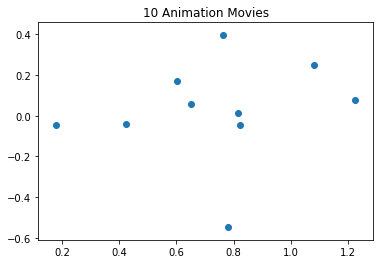

In [102]:
# Animation Movies
genre_2 = genres[:, 5]
genre_2_movieid = []
rating2 = []
for i in range(len(genre_2)): 
    if genre_2[i] == '1': 
        genre_2_movieid.append(genres[i][0])
m2 = np.zeros([2, 10])
for i in range(2): 
    for j in range(10): 
        index = genre_2_movieid[j]
        m2[i][j] = V_s[i][int(index)]
plt.scatter(m2[0], m2[1])
plt.title("10 Animation Movies")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

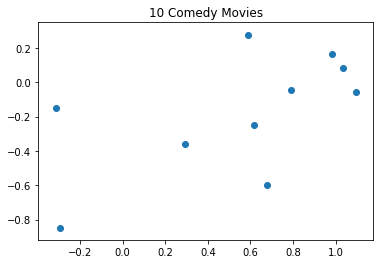

In [104]:
genre_3 = genres[:, 7]
genre_3_movieid = []
rating3 = []
for i in range(len(genre_3)): 
    if genre_3[i] == '1': 
        genre_3_movieid.append(genres[i][0])
m3 = np.zeros([2, 10])
for i in range(2): 
    for j in range(10): 
        index = genre_3_movieid[j]
        m3[i][j] = V_s[i][int(index)]
plt.scatter(m3[0], m3[1])
plt.title("10 Comedy Movies")
plt.show